INFERENTIAL STATISTICS PROJECT - EMPLOYEE PERFORMANCE ANALYSIS

Dataset Overview:
   employee_id department  years_experience  performance_score        salary  \
0            1         IT                 1          70.989035  67320.661191   
1            2         HR                 1          71.185837  83702.011426   
2            3      Sales                 3          78.813204  58202.236210   
3            4         IT                14          55.653272  61705.941903   
4            5         IT                 2          86.344580  51082.259209   
5            6         HR                 5          90.196882  68824.927777   
6            7      Sales                12          79.527555  55222.822340   
7            8      Sales                10          94.816212  55214.144684   
8            9         IT                 6          59.078019  68152.247294   
9           10  Marketing                 7          97.124590  75523.813906   

  training_completed promotion  satis

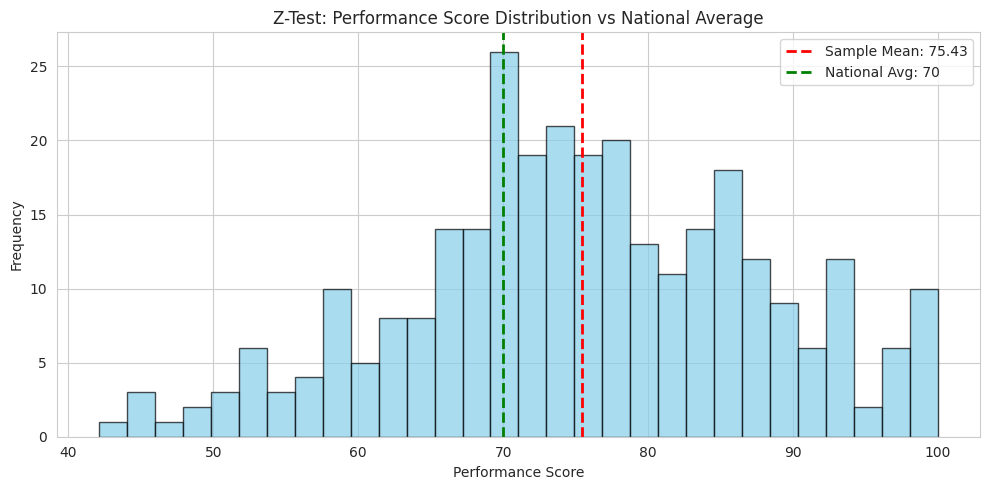

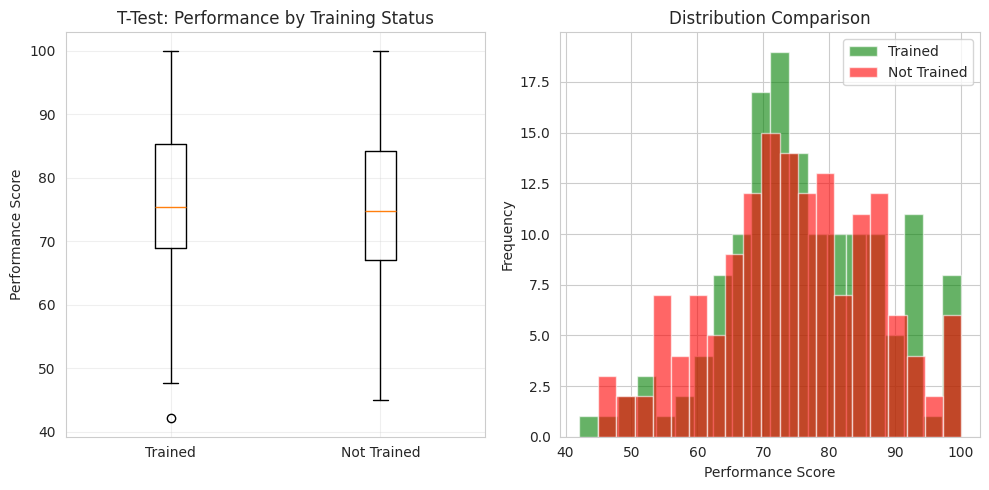

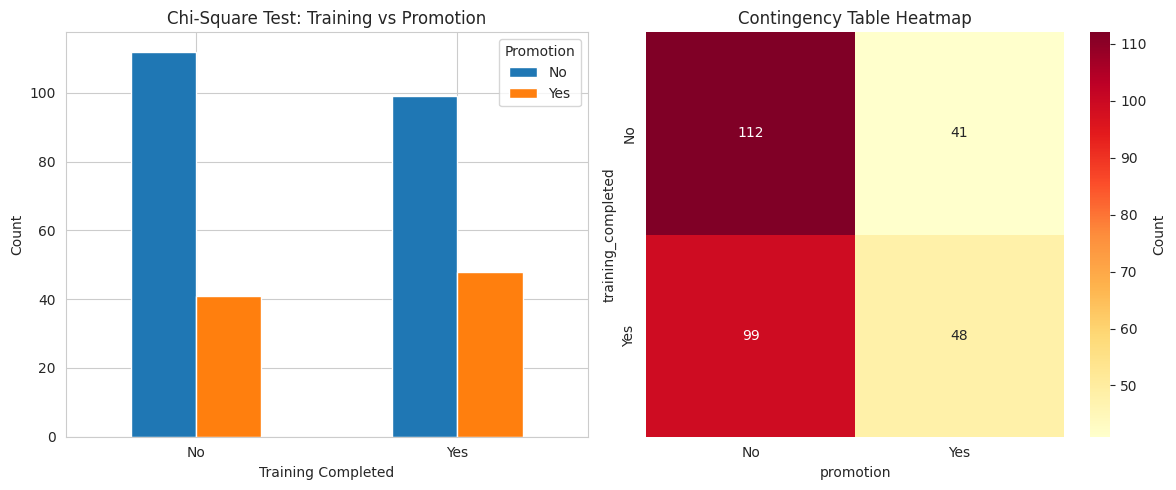

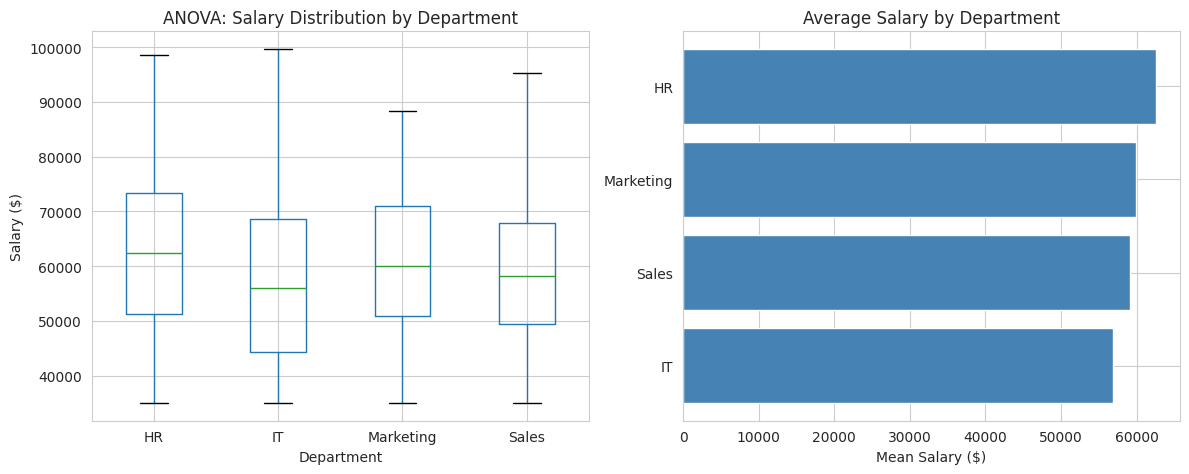

In [10]:
"""
INFERENTIAL STATISTICS PROJECT
Analysis: Z-test, T-test, Chi-Square, and ANOVA

This project analyzes employee performance data from a fictional company
to demonstrate various statistical tests.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# DATASET CREATION
# ============================================================================
np.random.seed(42)

# Create employee performance dataset
n_employees = 300

data = {
    'employee_id': range(1, n_employees + 1),
    'department': np.random.choice(['Sales', 'Marketing', 'IT', 'HR'], n_employees),
    'years_experience': np.random.randint(1, 16, n_employees),
    'performance_score': np.random.normal(75, 12, n_employees),
    'salary': np.random.normal(60000, 15000, n_employees),
    'training_completed': np.random.choice(['Yes', 'No'], n_employees),
    'promotion': np.random.choice(['Yes', 'No'], n_employees, p=[0.3, 0.7]),
    'satisfaction_rating': np.random.randint(1, 6, n_employees)
}

df = pd.DataFrame(data)
df['salary'] = df['salary'].clip(lower=35000)
df['performance_score'] = df['performance_score'].clip(lower=40, upper=100)

print("="*80)
print("INFERENTIAL STATISTICS PROJECT - EMPLOYEE PERFORMANCE ANALYSIS")
print("="*80)
print("\nDataset Overview:")
print(df.head(10))
print(f"\nDataset Shape: {df.shape}")
print("\nDescriptive Statistics:")
print(df.describe())

# ============================================================================
# 1. Z-TEST (One-Sample Z-Test)
# ============================================================================
print("\n" + "="*80)
print("1. Z-TEST: Testing if Average Performance Score Differs from National Average")
print("="*80)

# Hypothesis: Company average performance score differs from national average (70)
national_avg = 70
sample_mean = df['performance_score'].mean()
sample_std = df['performance_score'].std()
n = len(df)

# Calculate Z-statistic
z_stat = (sample_mean - national_avg) / (sample_std / np.sqrt(n))

# Calculate p-value (two-tailed test)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"\nNull Hypothesis (H0): μ = {national_avg} (Company performance equals national average)")
print(f"Alternative Hypothesis (H1): μ ≠ {national_avg}")
print(f"\nSample Mean: {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Sample Size: {n}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_z:.4f}")
print(f"Significance Level (α): 0.05")

if p_value_z < 0.05:
    print(f"\n✓ RESULT: Reject H0. Company performance ({sample_mean:.2f}) significantly differs from national average ({national_avg}).")
else:
    print(f"\n✗ RESULT: Fail to reject H0. No significant difference from national average.")

# Visualization
plt.figure(figsize=(10, 5))
plt.hist(df['performance_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(national_avg, color='green', linestyle='--', linewidth=2, label=f'National Avg: {national_avg}')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Z-Test: Performance Score Distribution vs National Average')
plt.legend()
plt.tight_layout()
plt.savefig('z_test_visualization.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 'z_test_visualization.png'")

# ============================================================================
# 2. T-TEST (Independent Two-Sample T-Test)
# ============================================================================
print("\n" + "="*80)
print("2. T-TEST: Comparing Performance Scores Between Training Groups")
print("="*80)

# Hypothesis: Performance differs between employees who completed training vs those who didn't
trained = df[df['training_completed'] == 'Yes']['performance_score']
not_trained = df[df['training_completed'] == 'No']['performance_score']

# Perform independent t-test
t_stat, p_value_t = stats.ttest_ind(trained, not_trained)

print(f"\nNull Hypothesis (H0): μ1 = μ2 (No difference in performance between groups)")
print(f"Alternative Hypothesis (H1): μ1 ≠ μ2")
print(f"\nTrained Group:")
print(f"  Mean: {trained.mean():.2f}, Std: {trained.std():.2f}, N: {len(trained)}")
print(f"\nNot Trained Group:")
print(f"  Mean: {not_trained.mean():.2f}, Std: {not_trained.std():.2f}, N: {len(not_trained)}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4f}")
print(f"Significance Level (α): 0.05")

if p_value_t < 0.05:
    print(f"\n✓ RESULT: Reject H0. Significant difference in performance between trained and non-trained employees.")
else:
    print(f"\n✗ RESULT: Fail to reject H0. No significant difference between groups.")

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([trained, not_trained], labels=['Trained', 'Not Trained'])
plt.ylabel('Performance Score')
plt.title('T-Test: Performance by Training Status')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(trained, alpha=0.6, label='Trained', bins=20, color='green')
plt.hist(not_trained, alpha=0.6, label='Not Trained', bins=20, color='red')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution Comparison')
plt.tight_layout()
plt.savefig('t_test_visualization.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 't_test_visualization.png'")

# ============================================================================
# 3. CHI-SQUARE TEST (Test of Independence)
# ============================================================================
print("\n" + "="*80)
print("3. CHI-SQUARE TEST: Relationship Between Training and Promotion")
print("="*80)

# Hypothesis: There's an association between training completion and promotion
contingency_table = pd.crosstab(df['training_completed'], df['promotion'])

print("\nNull Hypothesis (H0): Training and Promotion are independent")
print("Alternative Hypothesis (H1): Training and Promotion are associated")
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value_chi:.4f}")
print(f"Significance Level (α): 0.05")

if p_value_chi < 0.05:
    print(f"\n✓ RESULT: Reject H0. Significant association between training and promotion.")
else:
    print(f"\n✗ RESULT: Fail to reject H0. No significant association detected.")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected,
                   index=contingency_table.index,
                   columns=contingency_table.columns))

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
contingency_table.plot(kind='bar', ax=plt.gca())
plt.xlabel('Training Completed')
plt.ylabel('Count')
plt.title('Chi-Square Test: Training vs Promotion')
plt.legend(title='Promotion')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Contingency Table Heatmap')
plt.tight_layout()
plt.savefig('chi_square_visualization.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 'chi_square_visualization.png'")

# ============================================================================
# 4. ANOVA (One-Way Analysis of Variance)
# ============================================================================
print("\n" + "="*80)
print("4. ANOVA: Comparing Salaries Across Departments")
print("="*80)

# Hypothesis: Mean salary differs across departments
sales = df[df['department'] == 'Sales']['salary']
marketing = df[df['department'] == 'Marketing']['salary']
it = df[df['department'] == 'IT']['salary']
hr = df[df['department'] == 'HR']['salary']

# Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(sales, marketing, it, hr)

print("\nNull Hypothesis (H0): μ1 = μ2 = μ3 = μ4 (All departments have equal mean salaries)")
print("Alternative Hypothesis (H1): At least one department differs")

print("\nDepartment Statistics:")
for dept in ['Sales', 'Marketing', 'IT', 'HR']:
    dept_data = df[df['department'] == dept]['salary']
    print(f"  {dept}: Mean=${dept_data.mean():.2f}, Std=${dept_data.std():.2f}, N={len(dept_data)}")

print(f"\nF-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
print(f"Significance Level (α): 0.05")

if p_value_anova < 0.05:
    print(f"\n✓ RESULT: Reject H0. Significant difference in salaries across departments.")
else:
    print(f"\n✗ RESULT: Fail to reject H0. No significant difference detected.")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df.boxplot(column='salary', by='department', ax=plt.gca())
plt.xlabel('Department')
plt.ylabel('Salary ($)')
plt.title('ANOVA: Salary Distribution by Department')
plt.suptitle('')

plt.subplot(1, 2, 2)
dept_means = df.groupby('department')['salary'].mean().sort_values()
plt.barh(dept_means.index, dept_means.values, color='steelblue')
plt.xlabel('Mean Salary ($)')
plt.title('Average Salary by Department')
plt.tight_layout()
plt.savefig('anova_visualization.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 'anova_visualization.png'")

# ============================================================================
# SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY OF ALL STATISTICAL TESTS")
print("="*80)

summary_data = {
    'Test': ['Z-Test', 'T-Test', 'Chi-Square', 'ANOVA'],
    'Test Statistic': [f'{z_stat:.4f}', f'{t_stat:.4f}', f'{chi2_stat:.4f}', f'{f_stat:.4f}'],
    'P-Value': [f'{p_value_z:.4f}', f'{p_value_t:.4f}', f'{p_value_chi:.4f}', f'{p_value_anova:.4f}'],
    'Significant (α=0.05)': [
        'Yes' if p_value_z < 0.05 else 'No',
        'Yes' if p_value_t < 0.05 else 'No',
        'Yes' if p_value_chi < 0.05 else 'No',
        'Yes' if p_value_anova < 0.05 else 'No'
    ],
    'Purpose': [
        'Compare sample mean to population',
        'Compare two independent groups',
        'Test association between variables',
        'Compare multiple groups'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "="*80)
print("PROJECT COMPLETE - All visualizations saved!")
print("="*80)